# Transcriptome length explained by phenotypic plasticity and sensitivity of the genome to changes in transcription:

---

## loading required libraries:

In [1]:
library("jtools")
library("tidyverse")

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.6
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## loading working database from file:

In [2]:
working.db <- read_csv("File_S1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  org_id = col_double(),
  phen_id = col_double(),
  trans_id = col_double(),
  n_env = col_double(),
  trans_length = col_double(),
  fitness = col_double(),
  equ = col_double(),
  xor = col_double(),
  nor = col_double(),
  andn = col_double(),
  or = col_double(),
  orn = col_double(),
  and = col_double(),
  nand = col_double(),
  not = col_double()
)




## getting data:

In [3]:
#single-phenotype => plastic_phen = 0
#plastic-phenotype => plastic_phen = 1
#robust-transcriptome = sensitive_trans = 0
#sensitive-transcriptome = sensitive_trans = 1
db1 <- working.db %>%
    group_by(org_id) %>%
    summarise(n_phen = n_distinct(phen_id), n_trans = n_distinct(trans_id), n_env = sum(n_env), .groups = 'drop') %>%
    mutate(plastic_phen = as.factor(ifelse(n_phen == 1, 0, 1)),
           sensitive_trans = as.factor(ifelse(n_trans == 1, 0, 1))) %>%
    select(org_id, plastic_phen, sensitive_trans, n_env)

db <- inner_join(working.db %>% select(org_id, trans_id,trans_length),
                  db1 %>% select(org_id, plastic_phen, sensitive_trans),
                  by = "org_id") %>%
    select(-org_id) %>% distinct

## showing some data:

In [5]:
db %>% head

trans_id trans_length plastic_phen sensitive_trans
1 1        1927         0            0              
2 2        1047         0            0              
3 3        1624         0            0              
4 4        1160         0            0              
5 5        1929         0            0              
6 6        1134         0            0

## linear regression model (Table 2, bottom):

In [6]:
m <- lm(trans_length ~ plastic_phen * sensitive_trans,
        data = db)
summary(m)


Call:
lm(formula = trans_length ~ plastic_phen * sensitive_trans, data = db)

Residuals:
     Min       1Q   Median       3Q      Max 
-1943.33  -643.33   -55.33   927.67  2101.08 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     898.922      1.672  537.60   <2e-16 ***
plastic_phen1                    87.164      2.772   31.45   <2e-16 ***
sensitive_trans1                925.468      1.867  495.67   <2e-16 ***
plastic_phen1:sensitive_trans1   55.777      2.913   19.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 858.5 on 8055544 degrees of freedom
Multiple R-squared:  0.06693,	Adjusted R-squared:  0.06693 
F-statistic: 1.926e+05 on 3 and 8055544 DF,  p-value: < 2.2e-16


## sum contrast (the intercept becomes the grand mean):

In [7]:
m_sumContrast <- lm(trans_length ~ plastic_phen * sensitive_trans,
                    data = db,
                    contrasts = list(plastic_phen = "contr.sum", sensitive_trans = "contr.sum"))
summary(m_sumContrast)


Call:
lm(formula = trans_length ~ plastic_phen * sensitive_trans, data = db, 
    contrasts = list(plastic_phen = "contr.sum", sensitive_trans = "contr.sum"))

Residuals:
     Min       1Q   Median       3Q      Max 
-1943.33  -643.33   -55.33   927.67  2101.08 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1419.1817     0.7282 1948.90   <2e-16 ***
plastic_phen1                   -57.5261     0.7282  -79.00   <2e-16 ***
sensitive_trans1               -476.6783     0.7282 -654.60   <2e-16 ***
plastic_phen1:sensitive_trans1   13.9443     0.7282   19.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 858.5 on 8055544 degrees of freedom
Multiple R-squared:  0.06693,	Adjusted R-squared:  0.06693 
F-statistic: 1.926e+05 on 3 and 8055544 DF,  p-value: < 2.2e-16


## plotting:

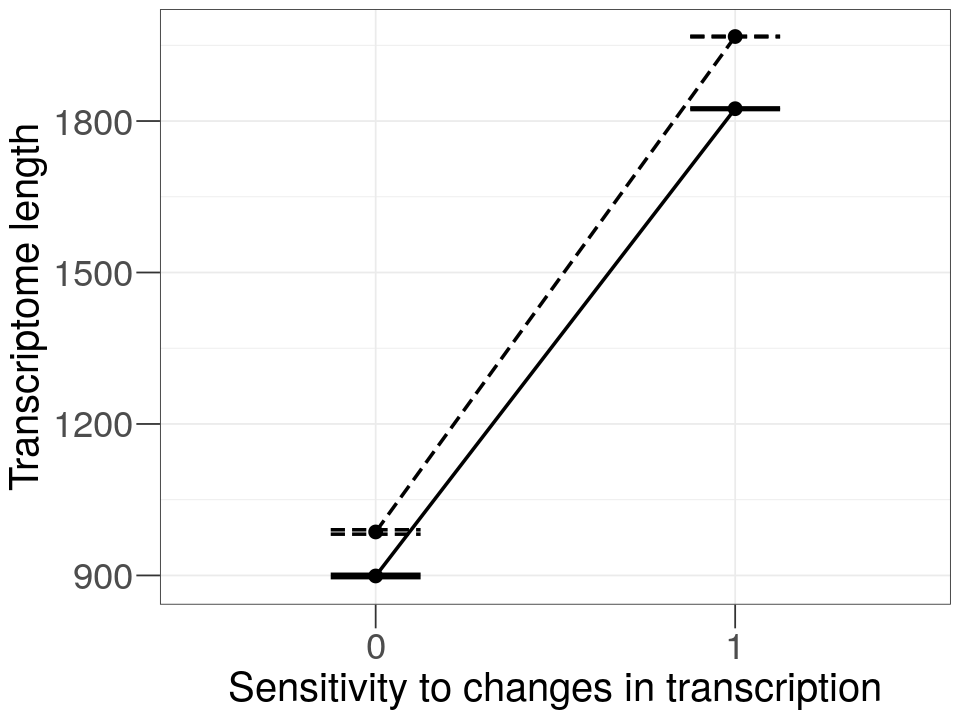

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
cat_plot(m, pred = sensitive_trans, modx = plastic_phen, geom = "line", vary.lty = TRUE,
         x.label = "Sensitivity to changes in transcription",
         y.label = "Transcriptome length",
         line.thickness = 1.0,
         colors = c("black", "black")) +
theme_bw() +
theme(axis.title = element_text(size = 24),
      axis.text = element_text(size = 22),
      axis.ticks.length = unit(0.5, "cm"),
      legend.position = "none")
# dashed line = plastic-phenotype organisms
# solid line = single-phenotype organisms

---